In [1]:
from pybaseball import statcast
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-whitegrid')
from datetime import datetime
pd.options.display.max_columns=2000
pd.options.display.max_rows=500

## Notebook fro q2: Park Effects
### Reading in data and combining from years 15-20

In [2]:
stat_15 = pd.read_csv('01_Data/statcast_15.csv', parse_dates=['game_date'])
stat_16 = pd.read_csv('01_Data/statcast_16.csv', parse_dates=['game_date'])
stat_17 = pd.read_csv('01_Data/statcast_17.csv', parse_dates=['game_date'])
stat_18 = pd.read_csv('01_Data/statcast_18.csv', parse_dates=['game_date'])
stat_19 = pd.read_csv('01_Data/statcast_19.csv', parse_dates=['game_date'])
stat_20 = pd.read_csv('01_Data/statcast_20.csv', parse_dates=['game_date'])

In [3]:
stat_years_combined_list = [stat_15, stat_16, stat_17, stat_18, stat_19, stat_20]
stat_years_combined_df = pd.concat(stat_years_combined_list, ignore_index=True)
stat_years_combined_df

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,0,FF,2015-11-01,96.1,-2.17,6.17,Wade Davis,527038.0,451584.0,strikeout,called_strike,NaN,NaN,NaN,NaN,13.0,Wilmer Flores called out on strikes.,W,R,R,NYM,KC,S,2.0,NaN,1.0,2.0,2015.0,-0.3,1.7,-0.93,1.62,NaN,624424.0,NaN,2.0,12.0,Bot,NaN,NaN,NaN,NaN,460077.0,NaN,151102_003434,3.075000,-139.609000,-9.724000,-2.028000,34.780000,-11.706000,3.54,1.56,NaN,NaN,NaN,95.4,2463.0,6.4,446277.0,451584.0,460077.0,543333.0,450314.0,519058.0,444876.0,460086.0,456715.0,449181.0,54.05,NaN,NaN,0.0,1.0,0.0,0.0,NaN,94.0,6.0,4-Seam Fastball,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Standard,Strategic
1,1,1,FC,2015-11-01,93.1,-1.82,6.27,Wade Davis,527038.0,451584.0,NaN,foul,NaN,NaN,NaN,NaN,9.0,NaN,W,R,R,NYM,KC,S,NaN,NaN,1.0,2.0,2015.0,0.2,0.7,0.78,1.55,NaN,624424.0,NaN,2.0,12.0,Bot,NaN,NaN,NaN,NaN,460077.0,NaN,151102_003407,5.156000,-135.442000,-7.227000,5.004000,28.835000,-25.323000,3.54,1.56,NaN,NaN,NaN,92.2,2705.0,5.9,446277.0,451584.0,460077.0,543333.0,450314.0,519058.0,444876.0,460086.0,456715.0,449181.0,54.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,5.0,Cutter,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Standard,Strategic
2,2,2,FF,2015-11-01,97.0,-1.80,6.25,Wade Davis,527038.0,451584.0,NaN,foul,NaN,NaN,NaN,NaN,14.0,NaN,W,R,R,NYM,KC,S,NaN,NaN,1.0,2.0,2015.0,-0.5,1.4,1.32,2.47,NaN,624424.0,NaN,2.0,12.0,Bot,NaN,NaN,NaN,NaN,460077.0,NaN,151102_003338,8.459000,-140.843000,-7.313000,-5.412000,31.551000,-15.189000,3.54,1.56,NaN,NaN,NaN,96.4,2362.0,6.3,446277.0,451584.0,460077.0,543333.0,450314.0,519058.0,444876.0,460086.0,456715.0,449181.0,54.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,4.0,4-Seam Fastball,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Standard,Strategic
3,3,3,FC,2015-11-01,93.6,-1.74,6.17,Wade Davis,527038.0,451584.0,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,W,R,R,NYM,KC,B,NaN,NaN,0.0,2.0,2015.0,0.3,0.8,2.92,2.23,NaN,NaN,624424.0,2.0,12.0,Bot,NaN,NaN,NaN,NaN,460077.0,NaN,151102_003312,10.094000,-135.734000,-5.821000,6.079000,26.355000,-24.250000,3.54,1.56,NaN,NaN,NaN,92.8,2724.0,6.0,446277.0,451584.0,460077.0,543333.0,450314.0,519058.0,444876.0,460086.0,456715.0,449181.0,54.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,3.0,Cutter,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Strategic,Strategic
4,4,4,FF,2015-11-01,97.1,-1.82,6.23,Wade Davis,527038.0,451584.0,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,W,R,R,NYM,KC,S,NaN,NaN,0.0,1.0,2015.0,-0.8,1.6,0.26,2.74,NaN,NaN,624424.0,2.0,12.0,Bot,NaN,NaN,NaN,NaN,460077.0,NaN,151102_003241,6.519000,-140.993000,-7.138000,-9.148000,32.251000,-11.956000,3.54,1.56,NaN,NaN,NaN,96.0,2401.0,6.1,446277.0,451584.0,460077.0,543333.0,450314.0,519058.0,444876.0,460086.0,456715.0,449181.0,54.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,2.0,4-Seam Fastball,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Strategic,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [4]:
#strftime takes a date time obj and converts it to a str
stat_years_combined_df['year'] = stat_years_combined_df['game_date'].apply(lambda x: x.strftime('%Y'))

In [5]:
stat_years_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925778 entries, 0 to 3925777
Data columns (total 92 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Unnamed: 0                       int64         
 1   index                            int64         
 2   pitch_type                       object        
 3   game_date                        datetime64[ns]
 4   release_speed                    float64       
 5   release_pos_x                    float64       
 6   release_pos_z                    float64       
 7   player_name                      object        
 8   batter                           float64       
 9   pitcher                          float64       
 10  events                           object        
 11  description                      object        
 12  spin_dir                         float64       
 13  spin_rate_deprecated             float64       
 14  break_angle_deprecated           f

In [6]:
#filtering specifically for batting data during the regular season
#selecing variables of interest
stat_combined_batting = stat_years_combined_df[stat_years_combined_df['game_type'] == 'R']
stat_combined_batting = stat_years_combined_df[['home_team', 'year', 'launch_angle', 'launch_speed', 'hit_distance_sc']]
stat_combined_batting

,home_team,year,launch_angle,launch_speed,hit_distance_sc
0,NYM,2015,NaN,NaN,NaN
1,NYM,2015,NaN,NaN,NaN
2,NYM,2015,NaN,NaN,NaN
3,NYM,2015,NaN,NaN,NaN
4,NYM,2015,NaN,NaN,NaN
...,...,...,...,...,...
3925773,WSH,2020,4.0,106.7,91.0
3925774,WSH,2020,NaN,NaN,NaN
3925775,WSH,2020,NaN,NaN,NaN
3925776,WSH,2020,NaN,NaN,NaN


In [7]:
stat_combined_batting.isnull().sum()

home_team                0
year                     0
launch_angle       3209680
launch_speed       3209618
hit_distance_sc    2961321
dtype: int64

In [8]:
#cleaning up data
stat_combined_batting = stat_combined_batting.dropna()
stat_combined_batting

,home_team,year,launch_angle,launch_speed,hit_distance_sc
6,NYM,2015,8.0,96.0,178.0
20,NYM,2015,47.0,95.8,288.0
23,NYM,2015,6.0,88.8,109.0
28,NYM,2015,10.0,104.0,220.0
34,NYM,2015,-4.0,90.0,23.0
...,...,...,...,...,...
3925760,WSH,2020,-30.0,73.4,5.0
3925762,WSH,2020,32.0,112.2,459.0
3925765,WSH,2020,-16.0,56.1,5.0
3925770,WSH,2020,4.0,108.0,102.0


In [9]:
stat_combined_batting.to_csv('01_Data/statcast_combined_batting.csv', index=False)

In [10]:
pd.read_csv('01_Data/statcast_combined_batting.csv')

,home_team,year,launch_angle,launch_speed,hit_distance_sc
0,NYM,2015,8.0,96.0,178.0
1,NYM,2015,47.0,95.8,288.0
2,NYM,2015,6.0,88.8,109.0
3,NYM,2015,10.0,104.0,220.0
4,NYM,2015,-4.0,90.0,23.0
...,...,...,...,...,...
657423,WSH,2020,-30.0,73.4,5.0
657424,WSH,2020,32.0,112.2,459.0
657425,WSH,2020,-16.0,56.1,5.0
657426,WSH,2020,4.0,108.0,102.0


In [11]:
#flitering for specific launch speed and launch angles
#combine with &
stat_combined_batting = stat_combined_batting[(stat_combined_batting['launch_speed'] >= 98) 
                                              & (stat_combined_batting['launch_angle'] >= 26) 
                                              & (stat_combined_batting['launch_angle'] <= 30)]

In [12]:
stat_combined_batting['hit_distance_sc'].describe()

count    14313.000000
mean       399.714386
std         25.592840
min        287.000000
25%        383.000000
50%        399.000000
75%        417.000000
max        505.000000
Name: hit_distance_sc, dtype: float64

In [13]:
hit_distance_avg = stat_combined_batting.groupby('home_team')['hit_distance_sc'].mean().sort_values(ascending = False)
hit_distance_avg

home_team
COL    424.634820
ARI    409.452242
TEX    404.007874
LAA    403.561475
TB     403.458090
MIN    402.441818
KC     402.127016
MIL    400.634656
WSH    399.442085
HOU    399.288330
BAL    399.218876
ATL    398.779476
OAK    398.358607
DET    398.057361
PIT    397.921671
TOR    397.877049
MIA    397.823096
LAD    397.711656
NYM    397.701632
NYY    397.649299
CWS    397.052752
BOS    396.818008
CIN    396.770455
CHC    396.375576
PHI    396.244813
SD     396.082380
STL    395.974082
CLE    395.128458
SEA    394.166000
SF     394.058952
Name: hit_distance_sc, dtype: float64

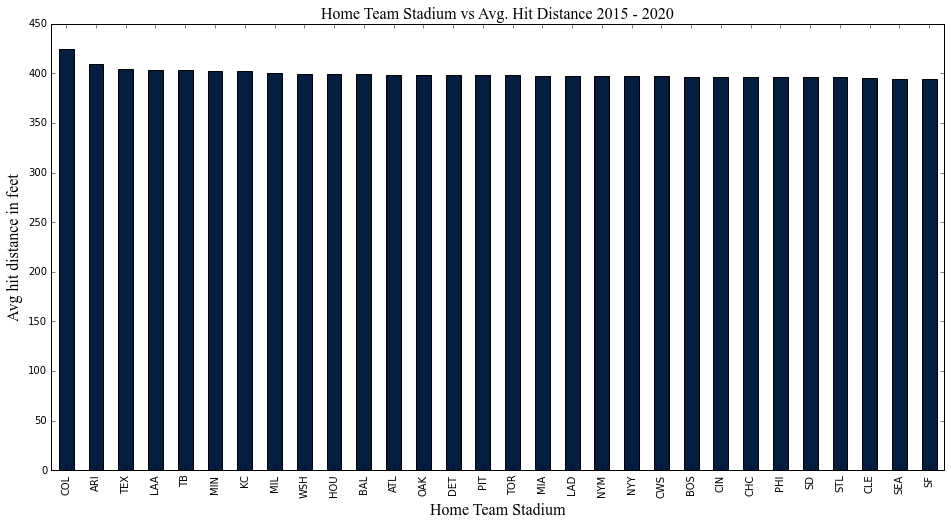

In [14]:
#bar plot to visualize home team stadium and hit dist
initial_plot = hit_distance_avg.plot(kind='bar', color=['#041E42'], figsize=(16,8), x='home_team', y="hit_distance_sc")
initial_plot.set_title('Home Team Stadium vs Avg. Hit Distance 2015 - 2020', fontname = "Times New Roman", fontsize = 16)
initial_plot.set_xlabel("Home Team Stadium", fontname = "Times New Roman", fontsize = 16)
initial_plot.set_ylabel("Avg hit distance in feet", fontname = "Times New Roman", fontsize = 16)
plt.savefig('03_Reports/hit_dist.png', bbox_inches='tight')
# plt.bar(x=stat_combined_batting['home_team'], y=stat_combined_batting["hit_distance_sc"])

In [15]:
# #Plot movement and speed
# fig2 = plt.figure(figsize = (15,7))
# ax2 = fig2.add_subplot(1,1,1)
# ax2.set_title('Vertical Movement and Speed of Fastballs and Curveballs 2015 - 2020', fontname = "Times New Roman", fontsize = 16)
# ax2.set_xlabel('Miles Per Hour', fontname = "Times New Roman", fontsize = 12)
# ax2.set_ylabel('Vertical Movement', fontname = "Times New Roman", fontsize = 12)

# move1 = ffmovement['pfx_z']
# speed1 = ffmovement['release_speed']
# move2 = cvmovement['pfx_z']
# speed2 = cvmovement['release_speed']

# ax2.scatter(speed1, move1, c = '#041E42', alpha = 0.25, label = "4-Seam Fastball")
# ax2.scatter(speed2, move2, c = '#FFC72C', alpha = 0.25, label = "Curveball")
# ax2.legend()

In [16]:
#reading in the elevation data
elevation_data = pd.read_csv('01_Data/elevations.csv', header=None)
elevation_data.columns = ['team', 'elevation_in_feet']

# elevation_data_complete = elevation_data[['elevation_in_feet']]
elevation_data
elevation_data.sort_values(by='elevation_in_feet', ascending=False)
# elevation_data_complete['log_elevation'] = np.log10(elevation_data['elevation_in_feet'])
# # elevation_data.dtypes
# elevation_data_complete

,team,elevation_in_feet
18,COL,5183
16,ARI,1082
28,ATL,1050
8,MIN,812
6,KC,750
25,PIT,743
21,CIN,683
0,TEX,616
12,CWS,596
29,CHC,596


In [17]:
#combining with hit distances
hit_dist_elevation = pd.merge(hit_distance_avg, elevation_data, how='inner', left_on='home_team', right_on='team')
#set index as team
hit_dist_elevation = hit_dist_elevation.set_index('team')
#reordering columns
hit_dist_elevation = hit_dist_elevation[['elevation_in_feet', 'hit_distance_sc']]

hit_dist_elevation

,elevation_in_feet,hit_distance_sc
team,,
COL,5183,424.634820
ARI,1082,409.452242
TEX,616,404.007874
TB,44,403.458090
MIN,812,402.441818
KC,750,402.127016
MIL,593,400.634656
HOU,38,399.288330
BAL,130,399.218876


slope: 0.005310    intercept: 396.583646
R-squared: 0.758013


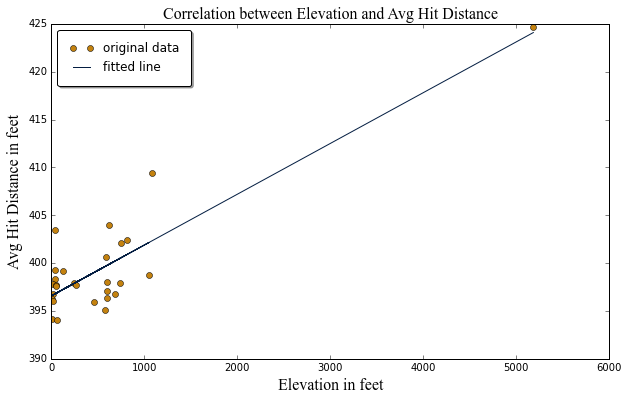

In [18]:
#creating scatter plot and regression
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

x = hit_dist_elevation['elevation_in_feet']
y = hit_dist_elevation['hit_distance_sc']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.figure(figsize=(10, 6))
plt.xlim(0, 6000)
plt.plot(x, y, 'o', label='original data', color = '#C4820F')
plt.plot(x, intercept + slope*x, 'r', label='fitted line', color='#041E42')
plt.legend(fancybox=True, framealpha=1, loc='upper left', shadow=True, borderpad=1)
plt.title('Correlation between Elevation and Avg Hit Distance', fontname = "Times New Roman", fontsize = 16)
plt.xlabel('Elevation in feet', fontname = "Times New Roman", fontsize = 16)
plt.ylabel('Avg Hit Distance in feet', fontname = "Times New Roman", fontsize = 16)

plt.savefig('03_Reports/Correlation.png', bbox_inches='tight')

In [19]:
#merging batting data with elevation data
all_hit_dist_elevation = pd.merge(stat_combined_batting, elevation_data, how='inner', left_on='home_team', right_on='team')
all_hit_dist_elevation

,home_team,year,launch_angle,launch_speed,hit_distance_sc,team,elevation_in_feet
0,NYM,2015,28.0,104.4,410.0,NYM,54
1,NYM,2015,30.0,100.5,390.0,NYM,54
2,NYM,2015,27.0,99.2,380.0,NYM,54
3,NYM,2015,28.0,110.4,459.0,NYM,54
4,NYM,2015,30.0,101.4,365.0,NYM,54
...,...,...,...,...,...,...,...
13302,MIL,2020,28.0,99.4,381.0,MIL,593
13303,MIL,2020,27.0,104.2,428.0,MIL,593
13304,MIL,2020,29.0,101.7,386.0,MIL,593
13305,MIL,2020,29.0,108.9,385.0,MIL,593


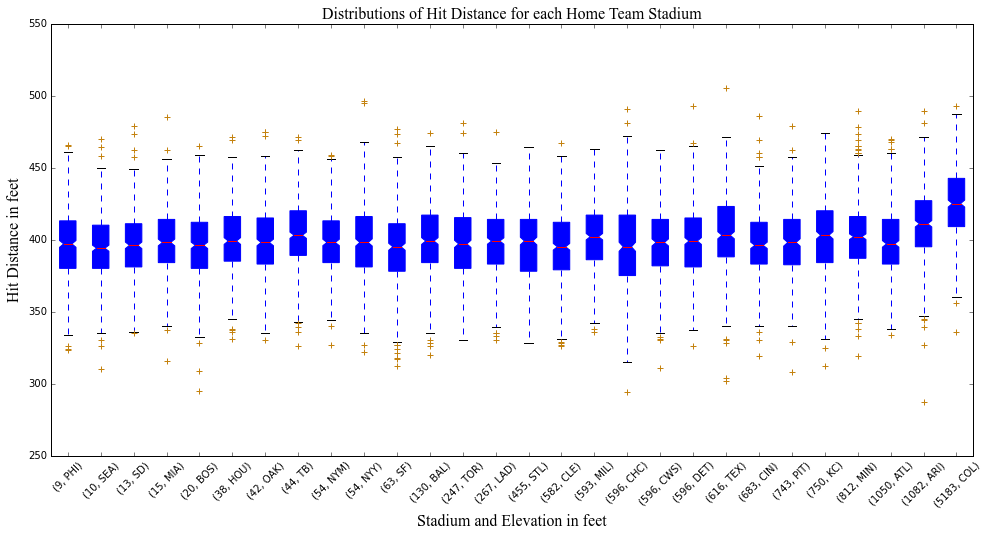

In [20]:
c = "#C4820F"
box = all_hit_dist_elevation.boxplot(column='hit_distance_sc', by=['elevation_in_feet', 'home_team'], figsize=(16,8), rot=45, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

plt.title('Distributions of Hit Distance for each Home Team Stadium', fontname = "Times New Roman", fontsize = 16)
plt.xlabel('Stadium and Elevation in feet', fontname = "Times New Roman", fontsize = 16)
plt.ylabel('Hit Distance in feet', fontname = "Times New Roman", fontsize = 16)
plt.suptitle('')
box.yaxis.grid(False)
box.xaxis.grid(False)
plt.savefig('03_Reports/boxplots.png')

In [47]:
#removing COL fromt the df
hit_dist_elevation_NoCOL = hit_dist_elevation.drop('COL')
hit_dist_elevation_NoCOL

,elevation_in_feet,hit_distance_sc
team,,
ARI,1082,409.452242
TEX,616,404.007874
TB,44,403.458090
MIN,812,402.441818
KC,750,402.127016
MIL,593,400.634656
HOU,38,399.288330
BAL,130,399.218876
ATL,1050,398.779476


slope: 0.004515    intercept: 396.863188
R-squared: 0.223109


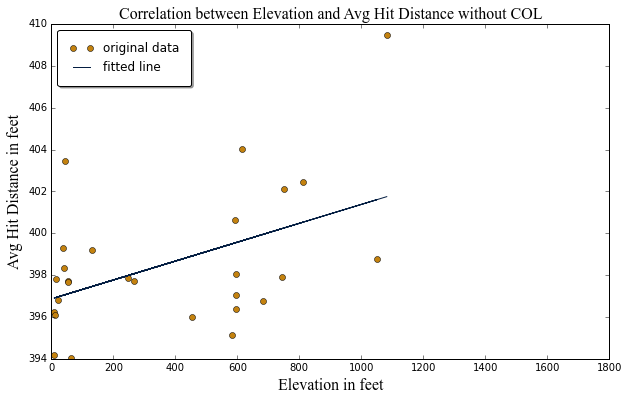

In [48]:
#looking at the regression without COL
x = hit_dist_elevation_NoCOL['elevation_in_feet']
y = hit_dist_elevation_NoCOL['hit_distance_sc']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.figure(figsize=(10, 6))
plt.xlim(0, 1800)
plt.plot(x, y, 'o', label='original data', color = '#C4820F')
plt.plot(x, intercept + slope*x, 'r', label='fitted line', color='#041E42')
plt.legend(fancybox=True, framealpha=1, loc='upper left', shadow=True, borderpad=1)
plt.title('Correlation between Elevation and Avg Hit Distance without COL', fontname = "Times New Roman", fontsize = 16)
plt.xlabel('Elevation in feet', fontname = "Times New Roman", fontsize = 16)
plt.ylabel('Avg Hit Distance in feet', fontname = "Times New Roman", fontsize = 16)

plt.savefig('03_Reports/NoCOL_Correlation.png', bbox_inches='tight')

## Now switching over to look at elevation and pitching

In [23]:
stat_years_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925778 entries, 0 to 3925777
Data columns (total 92 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Unnamed: 0                       int64         
 1   index                            int64         
 2   pitch_type                       object        
 3   game_date                        datetime64[ns]
 4   release_speed                    float64       
 5   release_pos_x                    float64       
 6   release_pos_z                    float64       
 7   player_name                      object        
 8   batter                           float64       
 9   pitcher                          float64       
 10  events                           object        
 11  description                      object        
 12  spin_dir                         float64       
 13  spin_rate_deprecated             float64       
 14  break_angle_deprecated           f

In [49]:
#filtering data for regular season adn pitching variables of interest
stat_combined_pitching = stat_years_combined_df[stat_years_combined_df['game_type'] == 'R']
stat_combined_pitching = stat_years_combined_df[['home_team', 'year', 'pitch_type', 'release_pos_x', 'release_pos_z', 'plate_x', 'pfx_x', 'plate_z', 'pfx_z']]
stat_combined_pitching

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
0,NYM,2015,FF,-2.17,6.17,-0.93,-0.3,1.62,1.7
1,NYM,2015,FC,-1.82,6.27,0.78,0.2,1.55,0.7
2,NYM,2015,FF,-1.80,6.25,1.32,-0.5,2.47,1.4
3,NYM,2015,FC,-1.74,6.17,2.92,0.3,2.23,0.8
4,NYM,2015,FF,-1.82,6.23,0.26,-0.8,2.74,1.6
...,...,...,...,...,...,...,...,...,...
3925773,WSH,2020,FF,-3.28,5.13,-0.19,-0.8,2.41,1.2
3925774,WSH,2020,CU,-3.36,5.48,-0.41,0.9,1.85,-0.8
3925775,WSH,2020,FF,-3.21,5.33,0.48,-0.8,2.07,1.3
3925776,WSH,2020,FF,-3.38,5.33,-1.17,-0.8,2.75,1.4


In [25]:
stat_combined_pitching.isnull().sum()

home_team            0
year                 0
pitch_type       16601
release_pos_x    38997
release_pos_z    38997
plate_x          12174
pfx_x            12174
plate_z          12174
pfx_z            12174
dtype: int64

In [50]:
#getting rid of na values
stat_combined_pitching = stat_combined_pitching.dropna()
stat_combined_pitching

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
0,NYM,2015,FF,-2.17,6.17,-0.93,-0.3,1.62,1.7
1,NYM,2015,FC,-1.82,6.27,0.78,0.2,1.55,0.7
2,NYM,2015,FF,-1.80,6.25,1.32,-0.5,2.47,1.4
3,NYM,2015,FC,-1.74,6.17,2.92,0.3,2.23,0.8
4,NYM,2015,FF,-1.82,6.23,0.26,-0.8,2.74,1.6
...,...,...,...,...,...,...,...,...,...
3925773,WSH,2020,FF,-3.28,5.13,-0.19,-0.8,2.41,1.2
3925774,WSH,2020,CU,-3.36,5.48,-0.41,0.9,1.85,-0.8
3925775,WSH,2020,FF,-3.21,5.33,0.48,-0.8,2.07,1.3
3925776,WSH,2020,FF,-3.38,5.33,-1.17,-0.8,2.75,1.4


In [27]:
stat_combined_pitching.to_csv('01_Data/statcast_combined_pitching.csv', index=False)

In [28]:
pd.read_csv('01_Data/statcast_combined_pitching.csv')

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
0,NYM,2015,FF,-2.17,6.17,-0.93,-0.3,1.62,1.7
1,NYM,2015,FC,-1.82,6.27,0.78,0.2,1.55,0.7
2,NYM,2015,FF,-1.80,6.25,1.32,-0.5,2.47,1.4
3,NYM,2015,FC,-1.74,6.17,2.92,0.3,2.23,0.8
4,NYM,2015,FF,-1.82,6.23,0.26,-0.8,2.74,1.6
...,...,...,...,...,...,...,...,...,...
3882337,WSH,2020,FF,-3.28,5.13,-0.19,-0.8,2.41,1.2
3882338,WSH,2020,CU,-3.36,5.48,-0.41,0.9,1.85,-0.8
3882339,WSH,2020,FF,-3.21,5.33,0.48,-0.8,2.07,1.3
3882340,WSH,2020,FF,-3.38,5.33,-1.17,-0.8,2.75,1.4


In [51]:
#setting type of pitch to curveball
stat_combined_pitching_CU = stat_combined_pitching[(stat_combined_pitching['pitch_type'] == 'CU')]


In [30]:
stat_combined_pitching_CU['pitch_type'].value_counts()

CU    322257
Name: pitch_type, dtype: int64

In [52]:

pd.options.mode.chained_assignment = None
stat_combined_pitching_CU['horizontal'] = (stat_combined_pitching['release_pos_x'] - stat_combined_pitching['plate_x'])
stat_combined_pitching_CU['vertical'] = (stat_combined_pitching['release_pos_z'] - stat_combined_pitching['plate_z'])
stat_combined_pitching_CU

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z,horizontal,vertical
74,NYM,2015,CU,1.80,5.51,-1.65,-0.6,0.00,-1.0,3.45,5.51
79,NYM,2015,CU,1.81,5.59,-0.94,-0.8,0.91,-1.0,2.75,4.68
111,NYM,2015,CU,-2.03,6.08,-0.11,0.6,1.30,-0.4,-1.92,4.78
114,NYM,2015,CU,-2.08,5.95,-0.69,1.4,1.96,-0.6,-1.39,3.99
143,NYM,2015,CU,-1.89,6.12,0.08,1.2,1.14,-0.5,-1.97,4.98
...,...,...,...,...,...,...,...,...,...,...,...
3925681,WSH,2020,CU,-3.29,5.64,-0.16,1.1,1.76,-0.8,-3.13,3.88
3925710,WSH,2020,CU,-3.23,5.60,0.41,1.2,0.79,-0.9,-3.64,4.81
3925734,WSH,2020,CU,-3.15,5.56,0.76,1.3,1.29,-0.7,-3.91,4.27
3925761,WSH,2020,CU,-3.27,5.47,0.31,1.0,0.13,-0.6,-3.58,5.34


In [32]:
stat_combined_pitching_CU['vertical'].describe()

count    322257.000000
mean          4.127476
std           1.146844
min          -5.980000
25%           3.380000
50%           4.100000
75%           4.860000
max          10.630000
Name: vertical, dtype: float64

In [33]:
stat_combined_pitching_CU['pfx_z'].describe()

count    322257.000000
mean         -0.644033
std           0.518698
min          -4.500000
25%          -1.000000
50%          -0.700000
75%          -0.300000
max           3.800000
Name: pfx_z, dtype: float64

In [34]:
elevation_data = pd.read_csv('01_Data/elevations.csv', header=None)
elevation_data.columns = ['team', 'elevation_in_feet']
# elevation_data.dtypes
elevation_data

,team,elevation_in_feet
0,TEX,616
1,ANA,160
2,BAL,130
3,DET,596
4,BOS,20
5,CLE,582
6,KC,750
7,OAK,42
8,MIN,812
9,TOR,247


In [53]:
#df for Philidephia
stat_combined_pitching_CU_PHI = stat_combined_pitching_CU[stat_combined_pitching_CU['home_team'] == "PHI"]
stat_combined_pitching_CU_PHI

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z,horizontal,vertical
12302,PHI,2015,CU,-2.07,4.91,-0.36,0.9,1.39,-0.1,-1.71,3.52
12304,PHI,2015,CU,-2.07,4.93,-0.52,0.8,2.07,-0.1,-1.55,2.86
12306,PHI,2015,CU,-2.10,4.99,1.25,-1.5,-1.27,0.4,-3.35,6.26
12308,PHI,2015,CU,-1.98,5.10,0.19,0.7,1.87,0.0,-2.17,3.23
12309,PHI,2015,CU,-1.98,5.02,0.32,0.5,1.07,-0.1,-2.30,3.95
...,...,...,...,...,...,...,...,...,...,...,...
3923947,PHI,2020,CU,3.13,6.34,0.23,-0.3,2.05,-0.4,2.90,4.29
3923948,PHI,2020,CU,3.34,6.14,0.13,-0.5,2.79,0.0,3.21,3.35
3923972,PHI,2020,CU,-1.93,6.07,-0.27,0.4,1.73,-0.3,-1.66,4.34
3923980,PHI,2020,CU,3.22,6.26,-0.52,-0.2,1.88,-0.1,3.74,4.38


In [54]:
#df for COL
stat_combined_pitching_CU_COL = stat_combined_pitching_CU[stat_combined_pitching['home_team'] == "COL"]
stat_combined_pitching_CU_COL


<ipython-input-54-767862e25714>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stat_combined_pitching_CU_COL = stat_combined_pitching_CU[stat_combined_pitching['home_team'] == "COL"]


,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z,horizontal,vertical
41116,COL,2015,CU,1.90,5.73,-0.27,-0.6,1.25,-0.4,2.17,4.48
41117,COL,2015,CU,1.83,5.87,-0.65,-0.6,1.44,-0.4,2.48,4.43
41132,COL,2015,CU,-2.04,6.69,-0.15,0.1,2.51,-0.5,-1.89,4.18
41135,COL,2015,CU,-1.96,6.72,-0.22,0.2,2.10,-0.5,-1.74,4.62
41141,COL,2015,CU,-2.11,6.56,-1.72,0.5,3.07,-0.6,-0.39,3.49
...,...,...,...,...,...,...,...,...,...,...,...
3895463,COL,2020,CU,-2.01,5.88,-0.31,0.9,1.63,-0.5,-1.70,4.25
3895467,COL,2020,CU,-1.92,5.85,-0.50,0.6,2.71,-0.5,-1.42,3.14
3895473,COL,2020,CU,-1.88,5.91,-0.07,0.7,0.80,-0.7,-1.81,5.11
3895477,COL,2020,CU,-2.23,6.03,-0.49,0.6,2.67,-1.3,-1.74,3.36


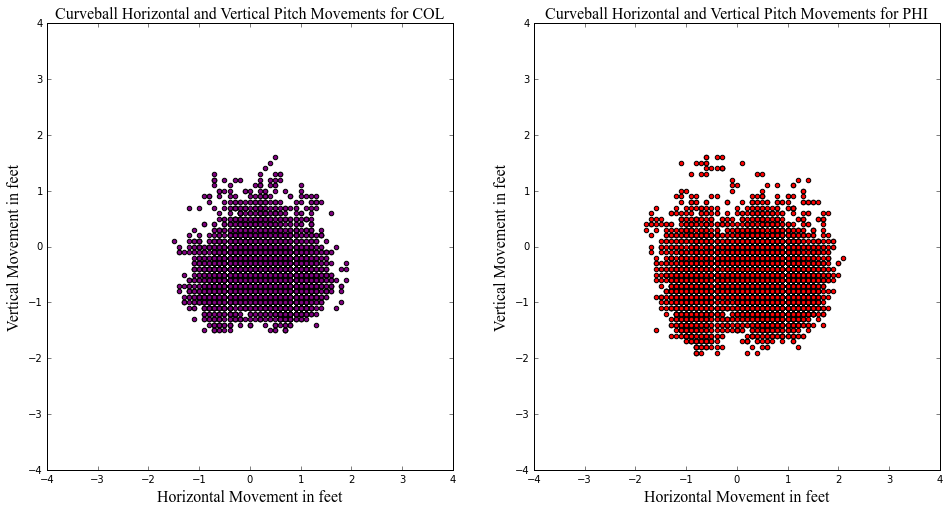

In [55]:
#plotting movement for Curveballs in COL and PHI 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

stat_combined_pitching_CU_COL.plot(kind='scatter', x='pfx_x', y='pfx_z', ax=axes[0], color='purple')    
stat_combined_pitching_CU_PHI.plot(kind='scatter', x='pfx_x', y='pfx_z', ax=axes[1], color='r') 
plt.setp(axes, xlim=(-4, 4), ylim=(-4, 4))
plt.title('Curveball Horizontal and Vertical Pitch Movements for PHI', fontname = "Times New Roman", fontsize = 16)
plt.xlabel('Horizontal Movement in feet', fontname = "Times New Roman", fontsize = 16)
plt.ylabel('Vertical Movement in feet', fontname = "Times New Roman", fontsize = 16)
axes[0].set_title('Curveball Horizontal and Vertical Pitch Movements for COL', fontname = "Times New Roman", fontsize = 16)
axes[0].set_xlabel('Horizontal Movement in feet', fontname = "Times New Roman", fontsize = 16)
axes[0].set_ylabel('Vertical Movement in feet', fontname = "Times New Roman", fontsize = 16)
plt.savefig('03_Reports/CUplot', bbox_inches='tight')
plt.show()


In [38]:
#CU is usually a more effective pitch based on sean's barreled chart
# 

In [56]:
#setting ptich to slider and repeating the above process
stat_combined_pitching
stat_combined_pitching_SL = stat_combined_pitching[stat_combined_pitching['pitch_type'] == 'SL']
stat_combined_pitching_SL

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
34,NYM,2015,SL,-2.27,5.82,-0.64,0.1,1.83,0.4
40,NYM,2015,SL,-2.26,5.72,-0.56,-0.1,1.14,0.2
44,NYM,2015,SL,-2.33,5.63,-0.18,0.2,1.78,0.0
45,NYM,2015,SL,-2.20,5.72,0.29,0.2,2.84,0.3
46,NYM,2015,SL,-2.32,5.69,0.98,-0.3,0.48,0.2
...,...,...,...,...,...,...,...,...,...
3925764,WSH,2020,SL,-3.22,5.64,-0.06,0.5,2.85,0.2
3925765,WSH,2020,SL,-3.27,5.32,0.71,0.3,0.99,0.1
3925766,WSH,2020,SL,-3.43,5.29,0.63,0.2,0.52,0.1
3925769,WSH,2020,SL,-3.39,5.33,-0.05,0.3,2.27,0.3


In [40]:
stat_combined_pitching_SL_PHI = stat_combined_pitching_SL[stat_combined_pitching_SL['home_team'] == "PHI"]
stat_combined_pitching_SL_PHI

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
12287,PHI,2015,SL,-2.34,6.27,0.88,-0.1,1.49,0.2
12291,PHI,2015,SL,-2.56,6.28,0.08,-0.3,2.26,0.1
12292,PHI,2015,SL,-2.46,6.32,-0.50,-0.2,2.43,0.3
12295,PHI,2015,SL,-2.77,6.34,0.97,-0.3,1.78,0.0
12298,PHI,2015,SL,-2.32,6.40,0.24,-0.3,3.32,0.4
...,...,...,...,...,...,...,...,...,...
3924131,PHI,2020,SL,-2.25,6.07,-0.78,0.6,3.69,0.2
3924142,PHI,2020,SL,-2.28,5.94,-1.28,0.0,0.58,0.5
3924145,PHI,2020,SL,-2.15,6.01,-0.02,0.1,1.28,0.3
3924146,PHI,2020,SL,-2.15,6.09,0.70,0.3,0.26,-0.4


In [41]:
stat_combined_pitching_SL_COL = stat_combined_pitching_SL[stat_combined_pitching_SL['home_team'] == "COL"]
stat_combined_pitching_SL_COL

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
41113,COL,2015,SL,1.97,5.69,-0.93,-0.5,2.56,0.6
41119,COL,2015,SL,1.84,5.64,-1.50,-0.3,1.48,0.2
41163,COL,2015,SL,-1.92,6.09,-0.07,0.1,2.58,0.4
41164,COL,2015,SL,-2.04,6.08,0.31,0.1,1.29,0.4
41182,COL,2015,SL,2.76,5.92,0.55,-0.1,1.52,0.4
...,...,...,...,...,...,...,...,...,...
3895483,COL,2020,SL,-2.63,5.75,0.26,0.1,1.99,-0.1
3895488,COL,2020,SL,-2.56,5.73,0.16,0.4,1.47,-0.4
3895489,COL,2020,SL,-2.58,5.80,-1.87,0.1,5.03,-0.5
3895492,COL,2020,SL,-2.61,5.76,-0.39,0.2,2.29,-0.1


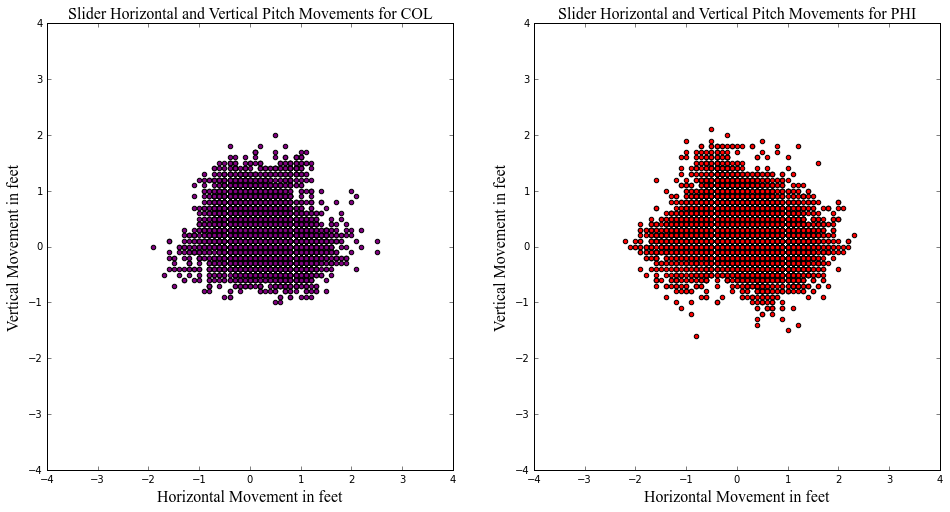

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

stat_combined_pitching_SL_COL.plot(kind='scatter', x='pfx_x', y='pfx_z', ax=axes[0], color='purple')    
stat_combined_pitching_SL_PHI.plot(kind='scatter', x='pfx_x', y='pfx_z', ax=axes[1], color='r') 
plt.setp(axes, xlim=(-4, 4), ylim=(-4, 4))
plt.title('Slider Horizontal and Vertical Pitch Movements for PHI', fontname = "Times New Roman", fontsize = 16)
plt.xlabel('Horizontal Movement in feet', fontname = "Times New Roman", fontsize = 16)
plt.ylabel('Vertical Movement in feet', fontname = "Times New Roman", fontsize = 16)
axes[0].set_title('Slider Horizontal and Vertical Pitch Movements for COL', fontname = "Times New Roman", fontsize = 16)
axes[0].set_xlabel('Horizontal Movement in feet', fontname = "Times New Roman", fontsize = 16)
axes[0].set_ylabel('Vertical Movement in feet', fontname = "Times New Roman", fontsize = 16)
plt.savefig('03_Reports/SLplot', bbox_inches='tight')
plt.show()

In [57]:
#settign pitch to four seam fastball and doing it all once again..
stat_combined_pitching
stat_combined_pitching_FF = stat_combined_pitching[stat_combined_pitching['pitch_type'] == 'FF']
stat_combined_pitching_FF_PHI = stat_combined_pitching_FF[stat_combined_pitching_FF['home_team'] == "PHI"]
stat_combined_pitching_FF_PHI

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
12288,PHI,2015,FF,-2.03,6.27,0.83,-0.6,2.59,1.8
12289,PHI,2015,FF,-1.88,6.29,1.81,-0.5,1.20,2.1
12290,PHI,2015,FF,-1.94,6.43,0.04,-0.4,2.33,1.8
12293,PHI,2015,FF,-2.21,6.47,-0.29,-0.2,2.83,1.4
12294,PHI,2015,FF,-2.07,6.38,0.52,-0.4,3.42,1.5
...,...,...,...,...,...,...,...,...,...
3924157,PHI,2020,FF,-1.93,5.00,-0.40,-1.2,1.35,1.2
3924160,PHI,2020,FF,-1.91,5.07,0.00,-1.0,2.70,1.3
3924166,PHI,2020,FF,-2.01,5.03,-0.79,-1.4,2.09,1.2
3924167,PHI,2020,FF,-1.97,5.04,-1.99,-1.2,2.98,1.3


In [58]:
stat_combined_pitching_FF_COL = stat_combined_pitching_FF[stat_combined_pitching_FF['home_team'] == "COL"]
stat_combined_pitching_FF_COL

,home_team,year,pitch_type,release_pos_x,release_pos_z,plate_x,pfx_x,plate_z,pfx_z
41112,COL,2015,FF,1.94,5.81,0.89,0.8,2.15,1.2
41114,COL,2015,FF,1.63,5.96,0.05,0.4,2.32,1.6
41115,COL,2015,FF,1.71,5.92,-0.66,0.4,2.50,1.5
41120,COL,2015,FF,1.90,5.79,-1.60,0.3,2.22,1.7
41121,COL,2015,FF,1.85,5.78,-0.46,0.6,2.03,1.4
...,...,...,...,...,...,...,...,...,...
3895500,COL,2020,FF,-1.99,5.65,-0.25,-0.7,2.89,0.9
3895501,COL,2020,FF,-2.03,5.63,-1.49,-0.9,2.42,0.7
3895503,COL,2020,FF,-2.04,5.57,0.40,-1.0,1.24,1.0
3895505,COL,2020,FF,-2.14,5.54,-0.38,-0.8,1.85,0.9


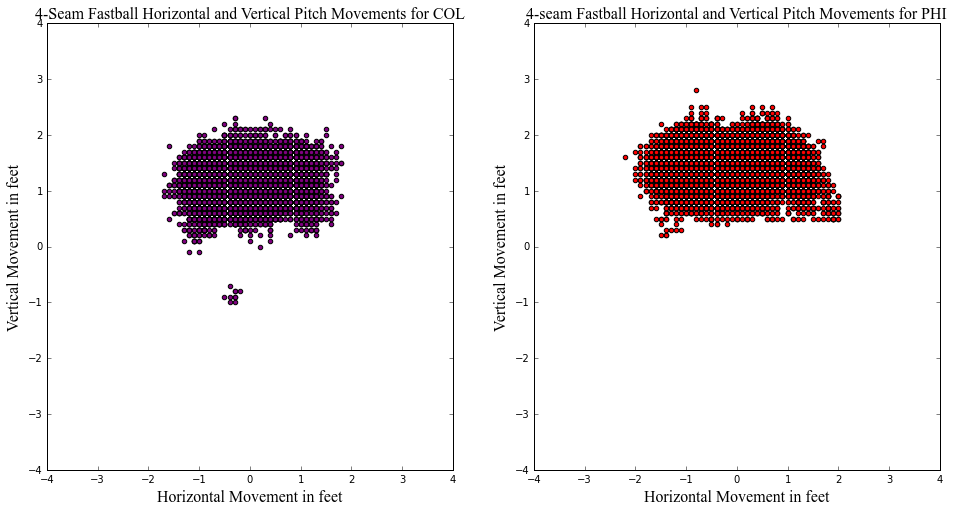

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

stat_combined_pitching_FF_COL.plot(kind='scatter', x='pfx_x', y='pfx_z', ax=axes[0], color='purple')    
stat_combined_pitching_FF_PHI.plot(kind='scatter', x='pfx_x', y='pfx_z', ax=axes[1], color='r') 
plt.setp(axes, xlim=(-4, 4), ylim=(-4, 4))
plt.title('4-seam Fastball Horizontal and Vertical Pitch Movements for PHI', fontname = "Times New Roman", fontsize = 16)
plt.xlabel('Horizontal Movement in feet', fontname = "Times New Roman", fontsize = 16)
plt.ylabel('Vertical Movement in feet', fontname = "Times New Roman", fontsize = 16)
axes[0].set_title('4-Seam Fastball Horizontal and Vertical Pitch Movements for COL', fontname = "Times New Roman", fontsize = 16)
axes[0].set_xlabel('Horizontal Movement in feet', fontname = "Times New Roman", fontsize = 16)
axes[0].set_ylabel('Vertical Movement in feet', fontname = "Times New Roman", fontsize = 16)
plt.savefig('03_Reports/FFplot', bbox_inches='tight')
plt.show()